In [3]:
from jieba import analyse
tfidf = analyse.extract_tags
textrank = analyse.textrank

## 导入爬取自豆瓣的文章数据 (太多了所以没有放到GitHub上来)

In [4]:
import glob
doc_dirs = glob.glob("./dataset/*.txt")
text = []
for doc_dir in doc_dirs:
    with open(doc_dir,"r") as fr:
        index = doc_dir.split("/")[-1].split(".")[0]
        text.append( fr.read() )

## 用 textrank 给每个词打分，选出得分最高的20个 

In [61]:
import jieba
result_1 = []
for t in text:
    keywords = textrank(t, withWeight=True)
    result_1.extend( keywords )

In [45]:
len(result_1),len(set(result_1))

(14685, 14006)

In [46]:
res_1 = [r[1] for r in set(result_1)]

## 查看这些词的得分分布 

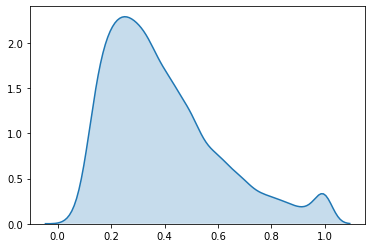

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(res_1, shade=True)
plt.show()

## 用 tfidf 给每个词打分，选出得分最高的20个 

In [52]:
result_2 = []
for t in text:
    keywords = tfidf(t, withWeight=True)
    result_2.extend( keywords )

In [53]:
len(result_2),len(set(result_2))

(14920, 14573)

In [54]:
res_2 = [r[1] for r in set(result_2)]

## 查看这些词的得分分布 

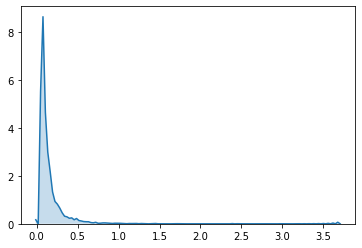

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(res_2, shade=True)
plt.show()

## 按文章介绍的规则选出最终的关键词 

In [27]:
result_1 = []
for t in text:
    keywords_1 = [ k[0] for k in textrank(t, withWeight=True) if k[1] > 0.6 ]
    keywords_2 = [ k[0] for k in tfidf(t, withWeight=True) if k[1] > 0.3 ]
    keywords = set(keywords_1 + keywords_2)
    if len(keywords) > 3:
        result_1.append( " ".join(keywords) )

In [28]:
bitcoin_keywords = result_1
len(bitcoin_keywords)

377

## 按同样的流程处理搜狐新闻的数据 

In [38]:
docs = []
with open("news_sohu.txt","r") as fr:
    docs = fr.readlines()
docs = [doc.replace("\n","") for doc in docs ]

In [39]:
result_1 = []
result_2 = []
for doc in docs:
    keywords_1 = textrank(doc, withWeight=True)
    result_1.extend( keywords_1 )
    keywords_2 = tfidf(doc, withWeight=True)
    result_2.extend( keywords_2 )
res_1 = [r[1] for r in set(result_1)]
res_2 = [r[1] for r in set(result_2)]

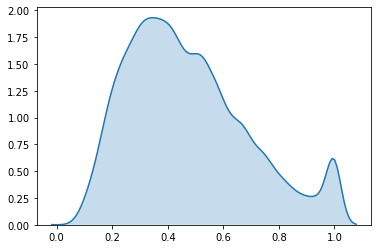

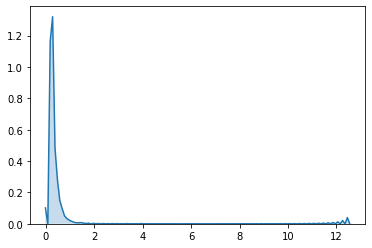

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(res_1, shade=True)
plt.savefig("textrank.png", dpi=300)
plt.show()
sns.kdeplot(res_2, shade=True)
plt.savefig("tfidf.png", dpi=300)
plt.show()

In [29]:
result_2 = []
for doc in docs:
    keywords_1 = [ k[0] for k in textrank(doc, withWeight=True) if k[1] > 0.6 ]
    keywords_2 = [ k[0] for k in tfidf(doc, withWeight=True) if k[1] > 0.5 ]
    keywords = set(keywords_1 + keywords_2)
    if len(keywords) > 3:
        result_2.append( " ".join(keywords) )

In [30]:
sohu_keywords = result_2
len(sohu_keywords),sohu_keywords[0]

(1900, '危害 散布 社会 侵害 凶杀 民族')

## 导入预训练好的模型 

In [31]:
from gensim.models.doc2vec import Doc2Vec
pretrained_model = Doc2Vec.load("zhiwiki_news.doc2vec")

In [32]:
len(bitcoin_keywords),len(sohu_keywords)

(377, 1900)

## 用预训练好的模型预测文本向量

In [33]:
embeddings = {}
for index, item in enumerate(bitcoin_keywords):
    sentence = item
    vector = pretrained_model.infer_vector(sentence.split(" "), alpha=0.025, steps=500)
    embeddings[str(index)] = vector

In [34]:
embeddings_ = {}
for index, item in enumerate(sohu_keywords):
    sentence = item
    vector = pretrained_model.infer_vector(sentence.split(" "), alpha=0.025, steps=500)
    embeddings_[str(index)] = vector

## 保存嵌入模型

In [35]:
import pickle
with open('./embedding_models/bitcoin_jieba.pkl', 'wb') as fw:
    pickle.dump({'embeddings': embeddings}, fw)
with open('./embedding_models/sohu_jieba.pkl', 'wb') as fw:
    pickle.dump({'embeddings': embeddings_}, fw)